In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing as p
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense

#utwórz zmienną EPOCHS i przypisz do niej wartość 10000 lub więcej

EPOCHS = 10000

#wczytaj dane heart

df = pd.read_csv('heart.csv')

#standaryzuj dane

data = np.asarray(df)
X = data[:,:-1]
y = data[:,-1]

data_ss = p.StandardScaler().fit_transform(X)
data_ss

#podziel je na dane treningowe i testowe

X_train, X_val, y_train, y_val = train_test_split(data_ss, y, train_size = 0.8, random_state=42)

In [2]:
from tensorflow.keras.callbacks import EarlyStopping
#ustawienie monitora wczesnego zatrzymania, monitorujemy wartość loss na zbiorze walidacyjnym
es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

In [3]:
#stwórz model o dwóch warstwach ukrytych (64 i 8). Nadaj modelowi i historii uczenia unikalną nazwę
#do polecenia fit dodaj jako argument callbacks = [es]

top_model = Sequential([
        Input(shape = (13)),
        Dense(64, activation = 'relu'),
        Dense(8, activation = 'relu'),
        Dense(1)
])

top_model.summary()

top_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

top_story = top_model.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_val, y_val), callbacks = [es])

_story = pd.DataFrame(top_story.history)
_story

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,425
Trainable params: 1,425
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10000
8/8 [==============================] - 1s 32ms/step - loss: 4.0030 - accuracy: 0.4587 - val_loss: 3.4909 - val_accuracy: 0.5082
Epoch 2/10000
8/8 [==============================] - 0s 6ms/step - loss: 2.2861 - accuracy: 0.4917 - val_loss: 2.2832 - val_accuracy: 0.5410
Epoch 3/10000
8/8 [================

,loss,accuracy,val_loss,val_accuracy
0,4.002982,0.458678,3.490924,0.508197
1,2.286100,0.491736,2.283179,0.540984
2,1.373290,0.549587,1.452395,0.622951
3,0.878780,0.570248,0.744940,0.639344
4,0.685360,0.623967,0.610166,0.672131
5,0.620106,0.657025,0.556916,0.721311
6,0.516400,0.685950,0.533652,0.754098
7,0.481505,0.690083,0.513043,0.754098
8,0.454115,0.706612,0.508124,0.770492
9,0.440668,0.727273,0.683166,0.770492


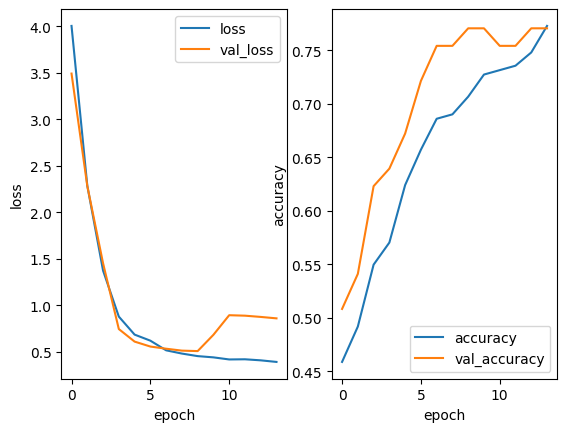

In [7]:
#za pomocą polecenia sublpot z lewej strony wyświetl loss, z prawej accuracy

plt.subplot(1,2,1)
plt.plot(_story.loss, label = "loss")
plt.plot(_story.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(_story.accuracy, label = "accuracy")
plt.plot(_story.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

In [8]:
#stwórz model o dwóch warstwach ukrytych (4 i 2). Nadaj modelowi i historii uczenia unikalną nazwę
#do polecenia fit dodaj jako argument callbacks = [es]

platek_sniegu = Sequential([
        Input(shape = (13)),
        Dense(64, activation = 'relu'),
        Dense(8, activation = 'relu'),
        Dense(1)
])

platek_sniegu.summary()

platek_sniegu.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

zima_story = platek_sniegu.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_val, y_val), callbacks = [es])

frozen = pd.DataFrame(zima_story.history)
frozen

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,425
Trainable params: 1,425
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10000
8/8 [==============================] - 1s 29ms/step - loss: 2.8615 - accuracy: 0.3843 - val_loss: 3.2014 - val_accuracy: 0.4590
Epoch 2/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.6341 - accuracy: 0.4917 - val_loss: 1.7084 - val_accuracy: 0.5246
Epoch 3/10000
8/8 [==============

,loss,accuracy,val_loss,val_accuracy
0,2.861501,0.384298,3.201438,0.459016
1,1.634081,0.491736,1.708351,0.524590
2,0.976743,0.595041,1.700302,0.573770
3,0.763991,0.690083,1.408460,0.622951
4,0.623721,0.727273,1.133684,0.688525
5,0.569673,0.768595,1.070218,0.704918
6,0.536351,0.789256,1.026770,0.704918
7,0.515438,0.797521,0.999387,0.721311
8,0.498576,0.809917,0.981811,0.721311
9,0.485505,0.814050,0.968019,0.737705


In [6]:
#za pomocą polecenia sublpot z lewej strony wyświetl loss, z prawej accuracy

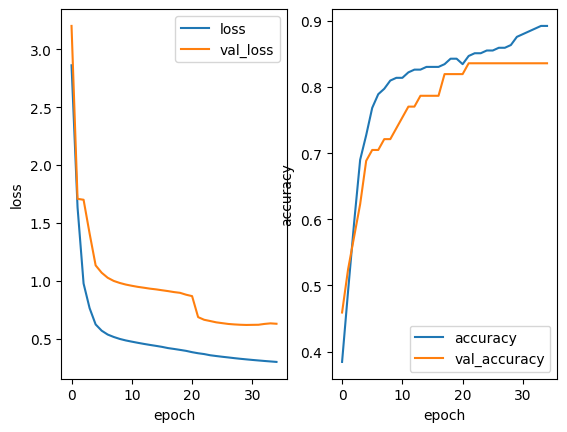

In [9]:
plt.subplot(1,2,1)
plt.plot(frozen.loss, label = "loss")
plt.plot(frozen.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(frozen.accuracy, label = "accuracy")
plt.plot(frozen.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()